In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("BigMartProductSalesFactors.csv")

In [3]:
df.head()

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.tail()

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2349.547110
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1892.981544
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,4533.564958
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,1302.235520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ItemIdentifier            14204 non-null  object 
 1   ItemWeight                11765 non-null  float64
 2   ItemFatContent            14204 non-null  object 
 3   ItemVisibility            14204 non-null  float64
 4   ItemType                  14204 non-null  object 
 5   ItemMRP                   14204 non-null  float64
 6   OutletIdentifier          14204 non-null  object 
 7   OutletEstablishment Year  14204 non-null  int64  
 8   OutletSize                10188 non-null  object 
 9   OutletLocationType        14204 non-null  object 
 10  OutletType                14204 non-null  object 
 11  ItemOutletSales           14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
df.shape

(14204, 12)

In [7]:
df.count()

ItemIdentifier              14204
ItemWeight                  11765
ItemFatContent              14204
ItemVisibility              14204
ItemType                    14204
ItemMRP                     14204
OutletIdentifier            14204
OutletEstablishment Year    14204
OutletSize                  10188
OutletLocationType          14204
OutletType                  14204
ItemOutletSales             14204
dtype: int64

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14199    False
14200    False
14201    False
14202    False
14203    False
Length: 14204, dtype: bool

In [9]:
df.loc[df.duplicated()]

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales


In [10]:
##df.drop_duplicates(inplace = True)##

#only necessary when there are duplicated in the dataframe that needs to be drop/eliminated.

In [11]:
df.isnull().sum()

ItemIdentifier                 0
ItemWeight                  2439
ItemFatContent                 0
ItemVisibility                 0
ItemType                       0
ItemMRP                        0
OutletIdentifier               0
OutletEstablishment Year       0
OutletSize                  4016
OutletLocationType             0
OutletType                     0
ItemOutletSales                0
dtype: int64

In [12]:
df.loc[df.isnull().any(axis = 1)]

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.380000
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.763600
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.598600
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.535000
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.668000
...,...,...,...,...,...,...,...,...,...,...,...,...
14192,FDN31,NaN,Low Fat,0.072529,Fruits and Vegetables,188.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,4912.778372
14193,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,4147.868080
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1892.981544
14202,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,4533.564958


In [13]:
## Use the codes below to show all the rows and columns of the dataframe you're doing an analysis on.##

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
df

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.380000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2349.547110
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1892.981544
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,4533.564958


In [14]:
###---- I could use the the code below to replace all the "NaN"/"Null" rows that have missing data in the dataframe.
###---- In this specific case, I will drop them just for the sake of cleaning the data and ensuring that there are no "NaN/Null" datapoints in the DF.

#df["Item_Weight"].fillna("Unknown", inplace = True)
#df["Outlet_Size"].fillna("Unknown", inplace=True)

df.dropna(inplace=True)
df

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.608800
...,...,...,...,...,...,...,...,...,...,...,...,...
14196,FDF46,7.070,Low Fat,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1691.772707
14197,DRL35,15.700,Low Fat,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,612.708246
14198,FDW46,13.000,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,1001.645945
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465


In [15]:
df.loc[df["ItemFatContent"] == "LF"]

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales
210,DRK12,9.500,LF,0.041878,Soft Drinks,32.9900,OUT035,2004,Small,Tier 2,Supermarket Type1,133.160000
219,FDA39,6.320,LF,0.000000,Meat,40.2822,OUT035,2004,Small,Tier 2,Supermarket Type1,1139.183800
389,DRE49,20.750,LF,0.021250,Soft Drinks,150.5024,OUT046,1997,Small,Tier 1,Supermarket Type1,2580.640800
439,FDB11,16.000,LF,0.060797,Starchy Foods,223.8404,OUT013,1987,High,Tier 3,Supermarket Type1,3600.646400
455,NCE43,12.500,LF,0.103423,Household,169.9448,OUT035,2004,Small,Tier 2,Supermarket Type1,2897.561600
...,...,...,...,...,...,...,...,...,...,...,...,...
14015,FDM56,16.700,LF,0.070192,Fruits and Vegetables,107.9912,OUT046,1997,Small,Tier 1,Supermarket Type1,1395.970498
14027,NCK42,7.475,LF,0.013173,Household,214.6192,OUT018,2009,Medium,Tier 3,Supermarket Type2,2942.930723
14128,FDE22,9.695,LF,0.029573,Snack Foods,158.1920,OUT046,1997,Small,Tier 1,Supermarket Type1,2125.491540
14139,DRG36,14.150,LF,0.095767,Soft Drinks,170.2106,OUT018,2009,Medium,Tier 3,Supermarket Type2,1980.295780


In [16]:
df.loc[df["ItemFatContent"] == "reg"]

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales
81,FDN04,11.80,reg,0.014087,Frozen Foods,180.3344,OUT046,1997,Small,Tier 1,Supermarket Type1,1427.475200
151,FDR28,13.85,reg,0.026002,Frozen Foods,161.5210,OUT018,2009,Medium,Tier 3,Supermarket Type2,1794.331000
396,FDN58,13.80,reg,0.056961,Snack Foods,230.0984,OUT049,1999,Medium,Tier 1,Supermarket Type1,3707.174400
615,FDH45,15.10,reg,0.105647,Fruits and Vegetables,42.8796,OUT035,2004,Small,Tier 2,Supermarket Type1,949.430800
727,FDS28,8.18,reg,0.082530,Frozen Foods,56.9588,OUT049,1999,Medium,Tier 1,Supermarket Type1,744.364400
...,...,...,...,...,...,...,...,...,...,...,...,...
13846,FDI05,8.35,reg,0.126846,Frozen Foods,74.0354,OUT035,2004,Small,Tier 2,Supermarket Type1,1040.570253
13952,FDU37,9.50,reg,0.104671,Canned,80.9960,OUT049,1999,Medium,Tier 1,Supermarket Type1,1359.396940
13970,FDB46,10.50,reg,0.093686,Snack Foods,212.4244,OUT013,1987,High,Tier 3,Supermarket Type1,3177.268686
14065,FDW52,14.00,reg,0.037515,Frozen Foods,163.2526,OUT035,2004,Small,Tier 2,Supermarket Type1,2962.916861


In [17]:
df['ItemFatContent'].replace(["LF"], ["Low Fat"], inplace=True)
df['ItemFatContent'].replace(["low fat"], ["Low Fat"], inplace=True)
df['ItemFatContent'].replace(["reg"], ["Regular Fat"], inplace=True)
df['ItemFatContent'].replace(["Regular"], ["Regular Fat"], inplace=True)

In [18]:
#Now I change the categorical variables for "ItemFatContent" to numerical values. 
#This would later come in handy when doing logistic regressions, test of significance, odds ratio, percent change

df["ItemFatContent"].replace(["Low Fat", "Regular Fat"],[0,1], inplace=True)
df

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.608800
...,...,...,...,...,...,...,...,...,...,...,...,...
14196,FDF46,7.070,0,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1691.772707
14197,DRL35,15.700,0,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,612.708246
14198,FDW46,13.000,1,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,1001.645945
14199,FDB58,10.500,1,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465


In [19]:
df.corr()

,ItemWeight,ItemFatContent,ItemVisibility,ItemMRP,OutletEstablishment Year,ItemOutletSales
ItemWeight,1.000000,-0.034665,-0.012575,0.037563,0.001003,0.023585
ItemFatContent,-0.034665,1.000000,0.050827,-0.003884,0.000343,0.005657
ItemVisibility,-0.012575,0.050827,1.000000,-0.007026,0.000353,-0.007809
ItemMRP,0.037563,-0.003884,-0.007026,1.000000,-0.000299,0.742360
OutletEstablishment Year,0.001003,0.000343,0.000353,-0.000299,1.000000,-0.041587
ItemOutletSales,0.023585,0.005657,-0.007809,0.742360,-0.041587,1.000000


<AxesSubplot:>

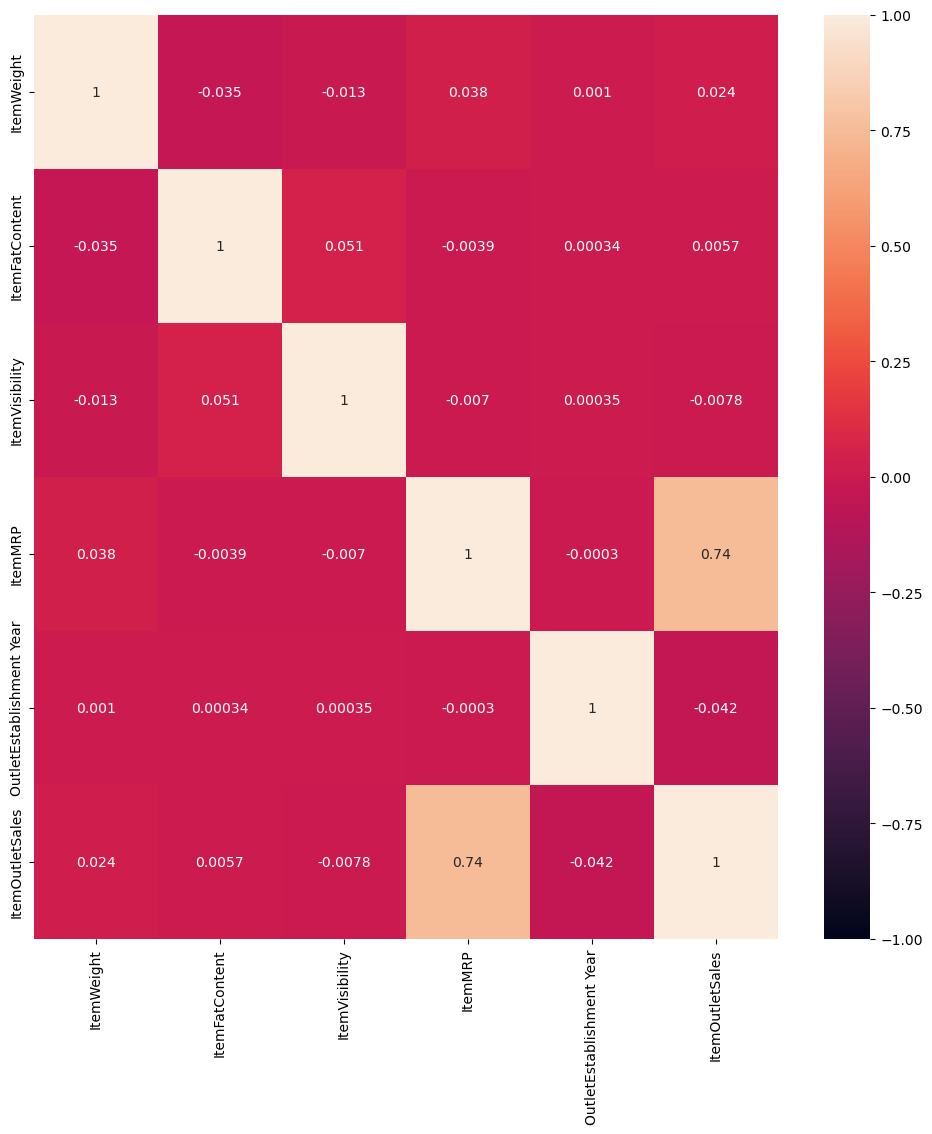

In [20]:
# show correlation of stats via heatmap
plt.figure(figsize=(12,12))

# calculate the correlation matrix for the numeric dataset 
corr = df.corr()

# plot a heat map to show the magnitude of the correlation between variables
sns.heatmap(corr, vmin = -1, annot = True)

In [21]:
df.describe()

,ItemWeight,ItemFatContent,ItemVisibility,ItemMRP,OutletEstablishment Year,ItemOutletSales
count,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000
mean,12.802506,0.353207,0.060046,141.044402,1999.190218,2177.297050
std,4.650631,0.477997,0.044208,62.098381,7.387966,1319.935718
min,4.555000,0.000000,0.000000,31.490000,1987.000000,69.243200
25%,8.710000,0.000000,0.025947,93.977800,1997.000000,1182.460800
50%,12.600000,0.000000,0.049363,142.147000,1999.000000,1944.142960
75%,16.750000,1.000000,0.087453,185.826600,2004.000000,2914.872400
max,21.350000,1.000000,0.188323,266.888400,2009.000000,10256.649000


In [22]:
dfz = df.copy()

In [23]:
dfz.shape

(7749, 12)

In [24]:
dfz

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.608800
...,...,...,...,...,...,...,...,...,...,...,...,...
14196,FDF46,7.070,0,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1691.772707
14197,DRL35,15.700,0,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,612.708246
14198,FDW46,13.000,1,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,1001.645945
14199,FDB58,10.500,1,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465


In [25]:
#we start looking for possible outliers per variables/columns to see if theres any that might affect the distribution od the DF#

dfz["zscore_ItemWeight"] = np.abs(stats.zscore(dfz["ItemWeight"]))
dfz.head()

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.753174
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.480004
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.010142
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.832738
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.517706


In [26]:
z_outliers = dfz.loc[dfz["zscore_ItemWeight"] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [27]:
##--- Only use the codes below if there are possible outliers on the variable/column you are testing

#dfz = dfz.drop(z_outliers)
#print(dfz.shape)

In [28]:
dfz["zscore_ItemFatContent"] = np.abs(stats.zscore(dfz["ItemFatContent"]))
dfz.head()

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.753174,0.738979
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.480004,1.353219
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.010142,0.738979
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.832738,0.738979
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.517706,1.353219


In [29]:
z_outliers = dfz.loc[dfz["zscore_ItemFatContent"] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [30]:
#checking the variable/column "ItemVisibility" with a value of greater than 1 because it can be a possible outlier.

dfz.loc[dfz["ItemVisibility"] >= 1]

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent


In [31]:
dfz["zscore_ItemVisibility"] = np.abs(stats.zscore(dfz["ItemVisibility"]))
dfz.head()

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.753174,0.738979,0.995320
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.480004,1.353219,0.922232
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.010142,0.738979,0.979196
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.832738,0.738979,1.358337
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.517706,1.353219,1.358337


In [32]:
z_outliers = dfz.loc[dfz["zscore_ItemVisibility"]>3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [33]:
#variable/column "ItemType" has different categories of products. Python can't compute total of item types as strings so I assigned integers/numbers per categories of ItemType.
#I will use this later in my analysis to determine which product sells the best for business scaling
##--- "Baking Goods", "Breads", "Breakfast", "Canned", "Dairy","Frozen Foods","Fruits and Vegetables","Hard Drinks", "Health and Hygiene","Household","Meat","Others","Seafood","Snack Foods","Soft Drinks","Starchy Foods"]
##---       1,           2,          3,          4,       5,       6,                   7,                  8,                9,                10,     11,     12,       13,         14,           15,           16

dfz["ItemType"].replace(["Baking Goods", "Breads", "Breakfast", "Canned", "Dairy","Frozen Foods","Fruits and Vegetables","Hard Drinks", "Health and Hygiene","Household","Meat","Others","Seafood","Snack Foods","Soft Drinks","Starchy Foods"],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
dfz

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility
0,FDA15,9.300,0,0.016047,5,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000,0.753174,0.738979,0.995320
1,DRC01,5.920,1,0.019278,15,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800,1.480004,1.353219,0.922232
2,FDN15,17.500,0,0.016760,11,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000,1.010142,0.738979,0.979196
4,NCD19,8.930,0,0.000000,10,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200,0.832738,0.738979,1.358337
5,FDP36,10.395,1,0.000000,1,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.608800,0.517706,1.353219,1.358337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14196,FDF46,7.070,0,0.094053,14,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1691.772707,1.232709,0.738979,0.769295
14197,DRL35,15.700,0,0.030704,8,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,612.708246,0.623073,0.738979,0.663769
14198,FDW46,13.000,1,0.070411,14,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,1001.645945,0.042469,1.353219,0.234478
14199,FDB58,10.500,1,0.013496,14,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465,0.495127,1.353219,1.053024


In [34]:
dfz["zscore_ItemType"] = np.abs(stats.zscore(dfz["ItemType"]))
dfz.head()

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility,zscore_ItemType
0,FDA15,9.300,0,0.016047,5,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.753174,0.738979,0.995320,0.767675
1,DRC01,5.920,1,0.019278,15,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.480004,1.353219,0.922232,1.601575
2,FDN15,17.500,0,0.016760,11,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.010142,0.738979,0.979196,0.653875
4,NCD19,8.930,0,0.000000,10,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.832738,0.738979,1.358337,0.416950
5,FDP36,10.395,1,0.000000,1,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.517706,1.353219,1.358337,1.715375


In [35]:
z_outliers = dfz.loc[dfz["zscore_ItemType"]>3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [36]:
dfz["zscore_ItemMRP"] = np.abs(stats.zscore(dfz["ItemMRP"]))
dfz.head()

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility,zscore_ItemType,zscore_ItemMRP
0,FDA15,9.300,0,0.016047,5,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.753174,0.738979,0.995320,0.767675,1.751605
1,DRC01,5.920,1,0.019278,15,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.480004,1.353219,0.922232,1.601575,1.494100
2,FDN15,17.500,0,0.016760,11,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.010142,0.738979,0.979196,0.653875,0.009238
4,NCD19,8.930,0,0.000000,10,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.832738,0.738979,1.358337,0.416950,1.404040
5,FDP36,10.395,1,0.000000,1,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.517706,1.353219,1.358337,1.715375,1.443667


In [37]:
z_outliers = dfz.loc[dfz["zscore_ItemMRP"]>3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [38]:
### --- replacing values for variable/column "OutletSize" to integers/numbers for analysis

### --- "Small","Medium","High"
### ---    1,       2,     3

dfz["OutletSize"].replace(["Small","Medium","High"],[1,2,3], inplace=True)
dfz

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility,zscore_ItemType,zscore_ItemMRP
0,FDA15,9.300,0,0.016047,5,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.138000,0.753174,0.738979,0.995320,0.767675,1.751605
1,DRC01,5.920,1,0.019278,15,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.422800,1.480004,1.353219,0.922232,1.601575,1.494100
2,FDN15,17.500,0,0.016760,11,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.270000,1.010142,0.738979,0.979196,0.653875,0.009238
4,NCD19,8.930,0,0.000000,10,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.705200,0.832738,0.738979,1.358337,0.416950,1.404040
5,FDP36,10.395,1,0.000000,1,51.4008,OUT018,2009,2,Tier 3,Supermarket Type2,556.608800,0.517706,1.353219,1.358337,1.715375,1.443667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14196,FDF46,7.070,0,0.094053,14,116.0834,OUT018,2009,2,Tier 3,Supermarket Type2,1691.772707,1.232709,0.738979,0.769295,1.364650,0.401985
14197,DRL35,15.700,0,0.030704,8,43.2770,OUT046,1997,1,Tier 1,Supermarket Type1,612.708246,0.623073,0.738979,0.663769,0.056900,1.574497
14198,FDW46,13.000,1,0.070411,14,63.4484,OUT049,1999,2,Tier 1,Supermarket Type1,1001.645945,0.042469,1.353219,0.234478,1.364650,1.249646
14199,FDB58,10.500,1,0.013496,14,141.3154,OUT046,1997,1,Tier 1,Supermarket Type1,2213.476465,0.495127,1.353219,1.053024,1.364650,0.004364


In [39]:
dfz["zscore_OutletSize"] = np.abs(stats.zscore(dfz["OutletSize"]))
dfz.head()

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility,zscore_ItemType,zscore_ItemMRP,zscore_OutletSize
0,FDA15,9.300,0,0.016047,5,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380,0.753174,0.738979,0.995320,0.767675,1.751605,0.266633
1,DRC01,5.920,1,0.019278,15,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228,1.480004,1.353219,0.922232,1.601575,1.494100,0.266633
2,FDN15,17.500,0,0.016760,11,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700,1.010142,0.738979,0.979196,0.653875,0.009238,0.266633
4,NCD19,8.930,0,0.000000,10,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052,0.832738,0.738979,1.358337,0.416950,1.404040,1.602214
5,FDP36,10.395,1,0.000000,1,51.4008,OUT018,2009,2,Tier 3,Supermarket Type2,556.6088,0.517706,1.353219,1.358337,1.715375,1.443667,0.266633


In [40]:
z_outliers = dfz.loc[dfz["zscore_OutletSize"]>3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [41]:
### --- replacing "OutletLocationType" from string & int to just int for data analysis
### --- "Tier 1","Tier 2","Tier 3" ===> 1, 2, 3

dfz["OutletLocationType"].replace(["Tier 1","Tier 2","Tier 3"], [1,2,3], inplace=True)
dfz

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility,zscore_ItemType,zscore_ItemMRP,zscore_OutletSize
0,FDA15,9.300,0,0.016047,5,249.8092,OUT049,1999,2,1,Supermarket Type1,3735.138000,0.753174,0.738979,0.995320,0.767675,1.751605,0.266633
1,DRC01,5.920,1,0.019278,15,48.2692,OUT018,2009,2,3,Supermarket Type2,443.422800,1.480004,1.353219,0.922232,1.601575,1.494100,0.266633
2,FDN15,17.500,0,0.016760,11,141.6180,OUT049,1999,2,1,Supermarket Type1,2097.270000,1.010142,0.738979,0.979196,0.653875,0.009238,0.266633
4,NCD19,8.930,0,0.000000,10,53.8614,OUT013,1987,3,3,Supermarket Type1,994.705200,0.832738,0.738979,1.358337,0.416950,1.404040,1.602214
5,FDP36,10.395,1,0.000000,1,51.4008,OUT018,2009,2,3,Supermarket Type2,556.608800,0.517706,1.353219,1.358337,1.715375,1.443667,0.266633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14196,FDF46,7.070,0,0.094053,14,116.0834,OUT018,2009,2,3,Supermarket Type2,1691.772707,1.232709,0.738979,0.769295,1.364650,0.401985,0.266633
14197,DRL35,15.700,0,0.030704,8,43.2770,OUT046,1997,1,1,Supermarket Type1,612.708246,0.623073,0.738979,0.663769,0.056900,1.574497,1.068947
14198,FDW46,13.000,1,0.070411,14,63.4484,OUT049,1999,2,1,Supermarket Type1,1001.645945,0.042469,1.353219,0.234478,1.364650,1.249646,0.266633
14199,FDB58,10.500,1,0.013496,14,141.3154,OUT046,1997,1,1,Supermarket Type1,2213.476465,0.495127,1.353219,1.053024,1.364650,0.004364,1.068947


In [42]:
dfz["zscore_OutletLocationType"] = np.abs(stats.zscore(dfz["OutletLocationType"]))
dfz.head()

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility,zscore_ItemType,zscore_ItemMRP,zscore_OutletSize,zscore_OutletLocationType
0,FDA15,9.300,0,0.016047,5,249.8092,OUT049,1999,2,1,Supermarket Type1,3735.1380,0.753174,0.738979,0.995320,0.767675,1.751605,0.266633,1.117908
1,DRC01,5.920,1,0.019278,15,48.2692,OUT018,2009,2,3,Supermarket Type2,443.4228,1.480004,1.353219,0.922232,1.601575,1.494100,0.266633,1.118196
2,FDN15,17.500,0,0.016760,11,141.6180,OUT049,1999,2,1,Supermarket Type1,2097.2700,1.010142,0.738979,0.979196,0.653875,0.009238,0.266633,1.117908
4,NCD19,8.930,0,0.000000,10,53.8614,OUT013,1987,3,3,Supermarket Type1,994.7052,0.832738,0.738979,1.358337,0.416950,1.404040,1.602214,1.118196
5,FDP36,10.395,1,0.000000,1,51.4008,OUT018,2009,2,3,Supermarket Type2,556.6088,0.517706,1.353219,1.358337,1.715375,1.443667,0.266633,1.118196


In [43]:
z_outliers = dfz.loc[dfz["zscore_OutletLocationType"]>3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [44]:
dfz["OutletType"].replace(["Supermarket Type1","Supermarket Type2","Supermarket Type3", "Grocery Store"],[1,2,3,4], inplace=True)
dfz.head()

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility,zscore_ItemType,zscore_ItemMRP,zscore_OutletSize,zscore_OutletLocationType
0,FDA15,9.300,0,0.016047,5,249.8092,OUT049,1999,2,1,1,3735.1380,0.753174,0.738979,0.995320,0.767675,1.751605,0.266633,1.117908
1,DRC01,5.920,1,0.019278,15,48.2692,OUT018,2009,2,3,2,443.4228,1.480004,1.353219,0.922232,1.601575,1.494100,0.266633,1.118196
2,FDN15,17.500,0,0.016760,11,141.6180,OUT049,1999,2,1,1,2097.2700,1.010142,0.738979,0.979196,0.653875,0.009238,0.266633,1.117908
4,NCD19,8.930,0,0.000000,10,53.8614,OUT013,1987,3,3,1,994.7052,0.832738,0.738979,1.358337,0.416950,1.404040,1.602214,1.118196
5,FDP36,10.395,1,0.000000,1,51.4008,OUT018,2009,2,3,2,556.6088,0.517706,1.353219,1.358337,1.715375,1.443667,0.266633,1.118196


In [45]:
dfz["zscore_OutletType"] = np.abs(stats.zscore(dfz["OutletType"]))
dfz.head()

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility,zscore_ItemType,zscore_ItemMRP,zscore_OutletSize,zscore_OutletLocationType,zscore_OutletType
0,FDA15,9.300,0,0.016047,5,249.8092,OUT049,1999,2,1,1,3735.1380,0.753174,0.738979,0.995320,0.767675,1.751605,0.266633,1.117908,0.499234
1,DRC01,5.920,1,0.019278,15,48.2692,OUT018,2009,2,3,2,443.4228,1.480004,1.353219,0.922232,1.601575,1.494100,0.266633,1.118196,2.003070
2,FDN15,17.500,0,0.016760,11,141.6180,OUT049,1999,2,1,1,2097.2700,1.010142,0.738979,0.979196,0.653875,0.009238,0.266633,1.117908,0.499234
4,NCD19,8.930,0,0.000000,10,53.8614,OUT013,1987,3,3,1,994.7052,0.832738,0.738979,1.358337,0.416950,1.404040,1.602214,1.118196,0.499234
5,FDP36,10.395,1,0.000000,1,51.4008,OUT018,2009,2,3,2,556.6088,0.517706,1.353219,1.358337,1.715375,1.443667,0.266633,1.118196,2.003070


In [46]:
z_outliers = dfz.loc[dfz["zscore_OutletType"]>3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [47]:
dfz["zscore_ItemOutletSales"] = np.abs(stats.zscore(dfz["ItemOutletSales"]))
dfz.head()

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,...,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility,zscore_ItemType,zscore_ItemMRP,zscore_OutletSize,zscore_OutletLocationType,zscore_OutletType,zscore_ItemOutletSales
0,FDA15,9.300,0,0.016047,5,249.8092,OUT049,1999,2,1,...,3735.1380,0.753174,0.738979,0.995320,0.767675,1.751605,0.266633,1.117908,0.499234,1.180316
1,DRC01,5.920,1,0.019278,15,48.2692,OUT018,2009,2,3,...,443.4228,1.480004,1.353219,0.922232,1.601575,1.494100,0.266633,1.118196,2.003070,1.313690
2,FDN15,17.500,0,0.016760,11,141.6180,OUT049,1999,2,1,...,2097.2700,1.010142,0.738979,0.979196,0.653875,0.009238,0.266633,1.117908,0.499234,0.060633
4,NCD19,8.930,0,0.000000,10,53.8614,OUT013,1987,3,3,...,994.7052,0.832738,0.738979,1.358337,0.416950,1.404040,1.602214,1.118196,0.499234,0.896004
5,FDP36,10.395,1,0.000000,1,51.4008,OUT018,2009,2,3,...,556.6088,0.517706,1.353219,1.358337,1.715375,1.443667,0.266633,1.118196,2.003070,1.227933


In [48]:
### --- Now that I have check for all possible outliers, my analysis begins

In [49]:
dfz.shape

(7749, 21)

In [50]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7749 entries, 0 to 14200
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ItemIdentifier             7749 non-null   object 
 1   ItemWeight                 7749 non-null   float64
 2   ItemFatContent             7749 non-null   int64  
 3   ItemVisibility             7749 non-null   float64
 4   ItemType                   7749 non-null   int64  
 5   ItemMRP                    7749 non-null   float64
 6   OutletIdentifier           7749 non-null   object 
 7   OutletEstablishment Year   7749 non-null   int64  
 8   OutletSize                 7749 non-null   int64  
 9   OutletLocationType         7749 non-null   int64  
 10  OutletType                 7749 non-null   int64  
 11  ItemOutletSales            7749 non-null   float64
 12  zscore_ItemWeight          7749 non-null   float64
 13  zscore_ItemFatContent      7749 non-null   floa

In [51]:
dfz.describe()

,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletEstablishment Year,OutletSize,OutletLocationType,OutletType,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility,zscore_ItemType,zscore_ItemMRP,zscore_OutletSize,zscore_OutletLocationType,zscore_OutletType,zscore_ItemOutletSales
count,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000
mean,12.802506,0.353207,0.060046,8.240160,141.044402,1999.190218,1.800361,1.999871,1.199510,2177.297050,0.872144,0.955933,0.817444,0.849351,0.844837,0.855268,0.894442,0.799263,0.786589
std,4.650631,0.477997,0.044208,4.221018,62.098381,7.387966,0.748787,0.894470,0.399658,1319.935718,0.489281,0.293605,0.576046,0.527863,0.535058,0.518220,0.447214,0.601020,0.617517
min,4.555000,0.000000,0.000000,1.000000,31.490000,1987.000000,1.000000,1.000000,1.000000,69.243200,0.000539,0.738979,0.000018,0.056900,0.000467,0.266633,0.000144,0.499234,0.000041
25%,8.710000,0.000000,0.025947,5.000000,93.977800,1997.000000,1.000000,1.000000,1.000000,1182.460800,0.473624,0.738979,0.380682,0.416950,0.402578,0.266633,1.117908,0.499234,0.336064
50%,12.600000,0.000000,0.049363,7.000000,142.147000,1999.000000,2.000000,2.000000,1.000000,1944.142960,0.867144,0.738979,0.734567,0.767675,0.738360,1.068947,1.117908,0.499234,0.683902
75%,16.750000,1.000000,0.087453,11.000000,185.826600,2004.000000,2.000000,3.000000,1.000000,2914.872400,1.278940,1.353219,1.122896,1.364650,1.328433,1.068947,1.118196,0.499234,1.094758
max,21.350000,1.000000,0.188323,16.000000,266.888400,2009.000000,3.000000,3.000000,2.000000,10256.649000,1.838040,1.353219,2.901840,1.838500,2.026657,1.602214,1.118196,2.003070,6.121414


# --- my first analysis to help scale the business of the company BigMart

In [52]:
##--- my first analysis to help scale the business of the company BigMart

dfz["ItemFatContent"].groupby(dfz["ItemType"]).mean()

##-- the groupby code shows total/added mean average/frequencies/percentage of itemtypes for low fat(1) and regular fat(1)
##-- crosstab code will show a full breakdown of ItemTypes being sold at Bigmart per ItemFatContent by percentages.

ItemType
1     0.505051
2     0.464286
3     0.650000
4     0.498316
5     0.388710
6     0.490298
7     0.458523
8     0.000000
9     0.000000
10    0.000000
11    0.611111
12    0.000000
13    0.400000
14    0.427264
15    0.150376
16    0.400000
Name: ItemFatContent, dtype: float64

Text(0.5, 1.0, 'ItemFatContent of Products Sold by BigMart per ItemType')

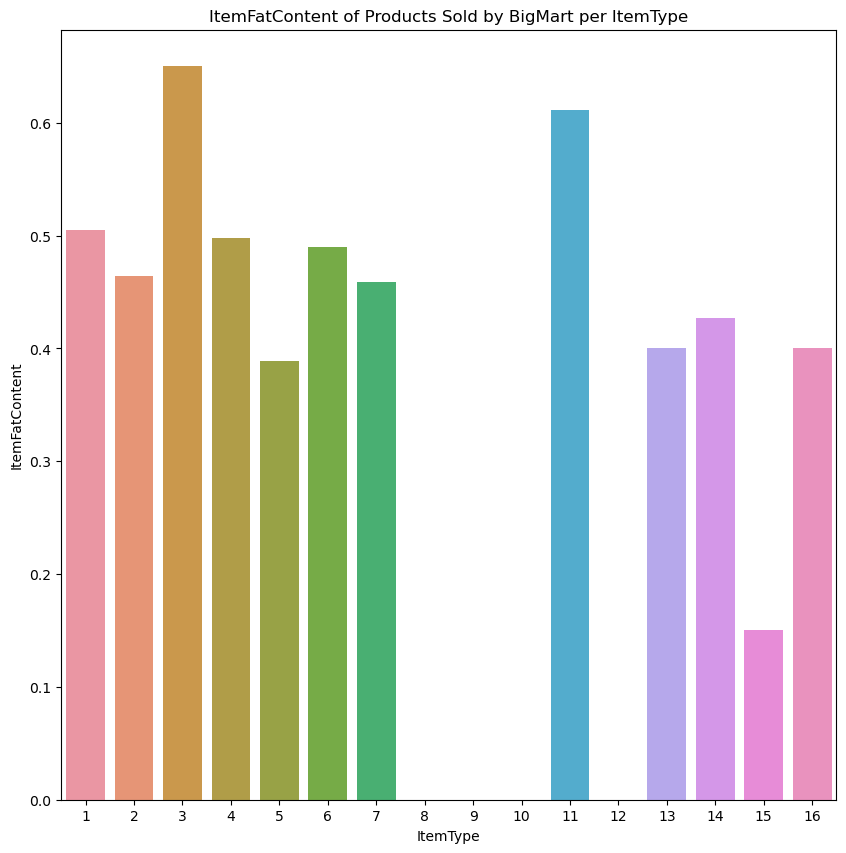

In [53]:
plt.figure(figsize=(10,10))

sns.barplot(data = dfz, x = "ItemType", y = "ItemFatContent", ci=None) #When you deleted "ci = None"; this shows the confidence interval per category.

plt.xticks(rotation = 360)
plt.title('ItemFatContent of Products Sold by BigMart per ItemType')

In [54]:
pd.crosstab(dfz["ItemFatContent"],dfz["ItemType"], margins=True, normalize=False)

#["Baking Goods", "Breads", "Breakfast", "Canned", "Dairy","Frozen Foods","Fruits and Vegetables","Hard Drinks", "Health and Hygiene","Household","Meat","Others","Seafood","Snack Foods","Soft Drinks","Starchy Foods"]
#        1,           2,         3,          4,       5,           6,              7,                    8,              9,               10,       11,     12,       13,         14,           15,            16

### -- 0 == Low Fat, 1 == Regular Fat

##-- if we focus just straight from the stat breakdown of the itemtypes, we can deduce that the best selling ItemType BigMart offers are the following:
#1. Fruits & Vegetables -- Item 7
#2. Snack Foods -- Item 14
#3. HouseHold --- Item 10

#If they focus on these 3 items and stock their inventory with these products, they will be able to scale thier business with higher profit margins.

#the cross tabulation also illustrates that majority of the products being sold at BigMart containing low fat & regular fat

ItemType,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
ItemFatContent,,,,,,,,,,,,,,,,,
0,294,120,35,298,379,394,594,198,469,842,154,150,30,626,339,90,5012
1,300,104,65,296,241,379,503,0,0,0,242,0,20,467,60,60,2737
All,594,224,100,594,620,773,1097,198,469,842,396,150,50,1093,399,150,7749


In [55]:
dfz["ItemType"].value_counts()

7     1097
14    1093
10     842
6      773
5      620
1      594
4      594
9      469
15     399
11     396
2      224
8      198
16     150
12     150
3      100
13      50
Name: ItemType, dtype: int64

In [56]:
dfz["ItemType"].value_counts(sum)

7     0.141567
14    0.141050
10    0.108659
6     0.099755
5     0.080010
1     0.076655
4     0.076655
9     0.060524
15    0.051491
11    0.051103
2     0.028907
8     0.025552
16    0.019357
12    0.019357
3     0.012905
13    0.006452
Name: ItemType, dtype: float64

In [57]:
dfz["ItemFatContent"].value_counts()

0    5012
1    2737
Name: ItemFatContent, dtype: int64

In [58]:
dfz["ItemFatContent"].value_counts(sum)

0    0.646793
1    0.353207
Name: ItemFatContent, dtype: float64

In [59]:
pd.crosstab(dfz["ItemFatContent"],dfz["ItemType"], margins=True, normalize=True)

ItemType,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
ItemFatContent,,,,,,,,,,,,,,,,,
0,0.037940,0.015486,0.004517,0.038457,0.048910,0.050845,0.076655,0.025552,0.060524,0.108659,0.019874,0.019357,0.003871,0.080785,0.043748,0.011614,0.646793
1,0.038715,0.013421,0.008388,0.038198,0.031101,0.048910,0.064912,0.000000,0.000000,0.000000,0.031230,0.000000,0.002581,0.060266,0.007743,0.007743,0.353207
All,0.076655,0.028907,0.012905,0.076655,0.080010,0.099755,0.141567,0.025552,0.060524,0.108659,0.051103,0.019357,0.006452,0.141050,0.051491,0.019357,1.000000


In [60]:
#["Baking Goods", "Breads", "Breakfast", "Canned", "Dairy","Frozen Foods","Fruits and Vegetables","Hard Drinks", "Health and Hygiene","Household","Meat","Others","Seafood","Snack Foods","Soft Drinks","Starchy Foods"]
#        1,           2,         3,          4,       5,           6,              7,                    8,              9,               10,       11,     12,       13,         14,           15,            16

Text(0.5, 1.0, 'Stat Breakdown of ItemFatContent per ItemType sold at BigMart')

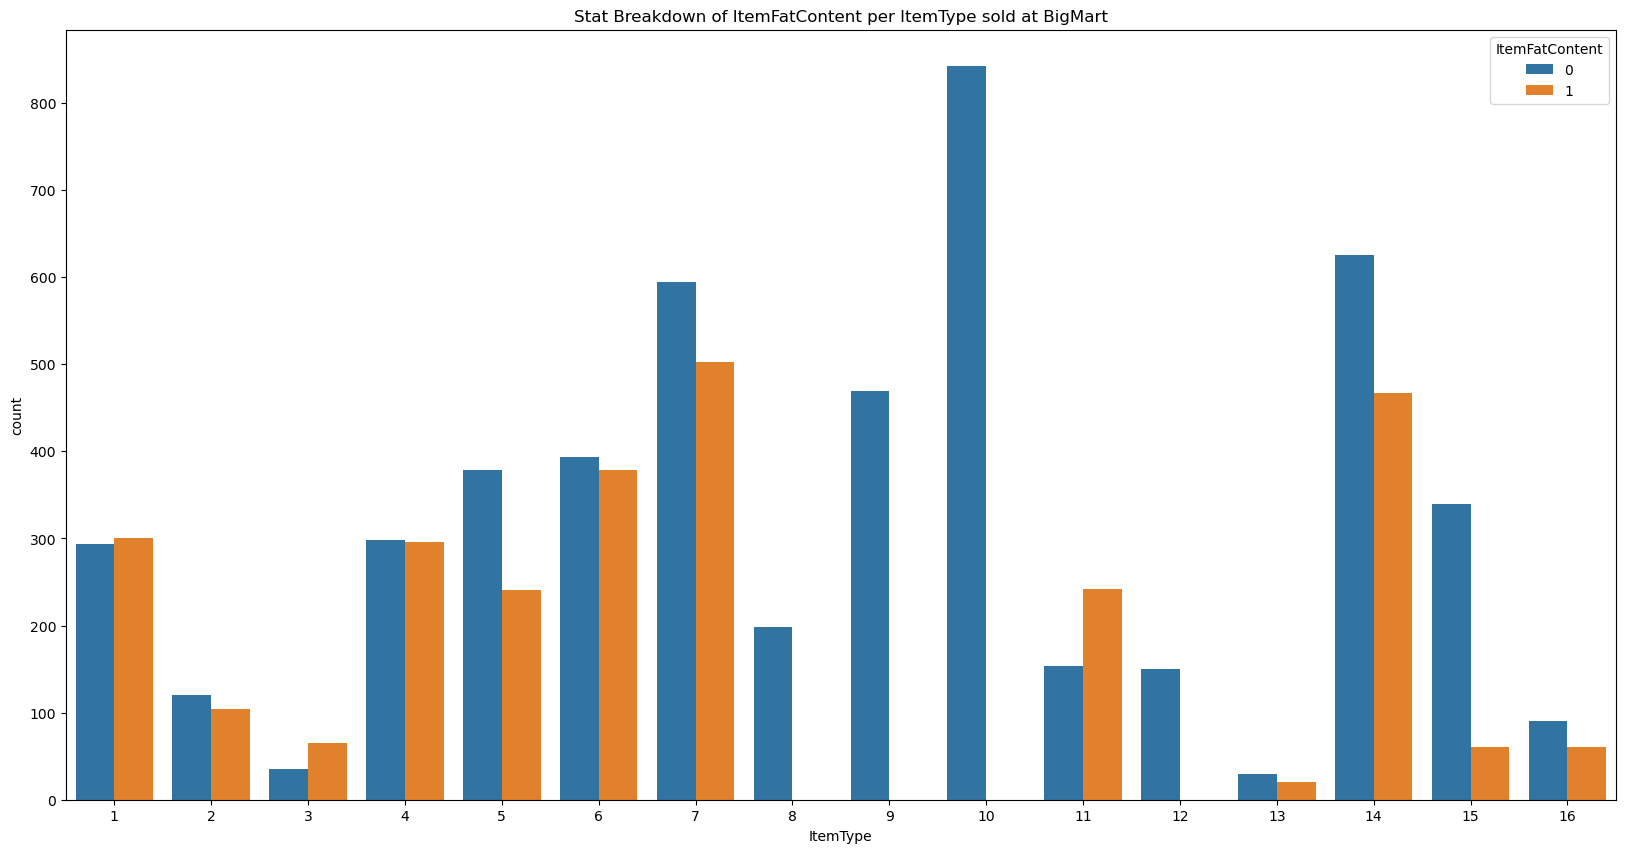

In [61]:
#this countplot shows the comparison in integers/numbers between low fat and regular fat per item type

plt.figure(figsize=(20,10))

sns.countplot(data = dfz, x = "ItemType", hue = "ItemFatContent")

plt.xticks(rotation = 360)
plt.title('Stat Breakdown of ItemFatContent per ItemType sold at BigMart')

In [62]:
pivot_table = dfz.pivot_table(index='ItemFatContent', columns='ItemType', values='ItemOutletSales', aggfunc='sum', margins=False)
print(pivot_table)

ItemType                   1              2              3              4   \
ItemFatContent                                                               
0               539567.642269  269299.146414   90560.224990  641588.689642   
1               632243.112985  241825.575332  124362.701815  632025.782385   

ItemType                   5              6             7              8   \
ItemFatContent                                                              
0               830971.447076  806913.002070  1.257555e+06  417007.518628   
1               543671.107726  807289.036815  1.182144e+06            NaN   

ItemType                   9             10             11             12  \
ItemFatContent                                                              
0               975260.208867  1.922427e+06  316976.539299  312254.079764   
1                         NaN           NaN  551802.907017            NaN   

ItemType                  13            14             15            

Text(0.5, 1.0, 'Stat Breakdown of ItemFatContent per ItemType sold at BigMart')

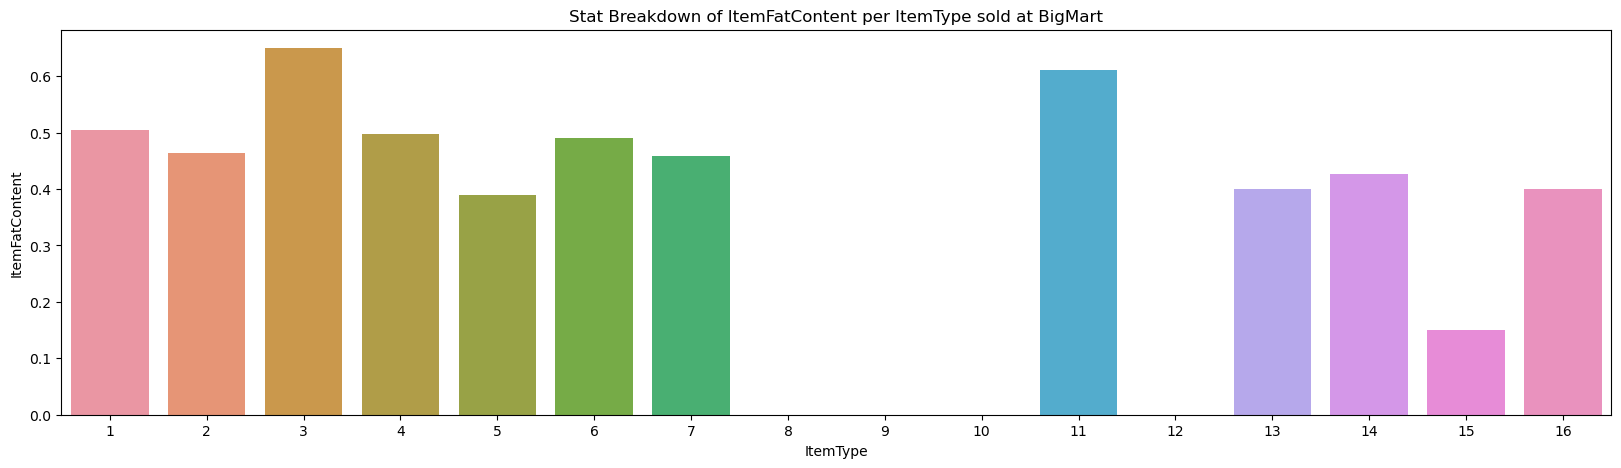

In [63]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "ItemType", y = "ItemFatContent", ci = None)

plt.xticks(rotation = 360)
plt.title('Stat Breakdown of ItemFatContent per ItemType sold at BigMart')

#["Baking Goods", "Breads", "Breakfast", "Canned", "Dairy","Frozen Foods","Fruits and Vegetables","Hard Drinks", "Health and Hygiene","Household","Meat","Others","Seafood","Snack Foods","Soft Drinks","Starchy Foods"]
#        1,           2,         3,          4,       5,           6,              7,                    8,              9,               10,       11,     12,       13,         14,           15,            16

In [64]:
dfz["ItemOutletSales"].groupby(dfz["ItemFatContent"]).mean()

ItemFatContent
0    2171.779097
1    2187.401536
Name: ItemOutletSales, dtype: float64

In [65]:
dfz["ItemOutletSales"].groupby(dfz["ItemFatContent"]).max()

ItemFatContent
0     9779.9362
1    10256.6490
Name: ItemOutletSales, dtype: float64

In [66]:
dfz["ItemOutletSales"].groupby(dfz["ItemFatContent"]).min()

ItemFatContent
0    69.2432
1    75.9012
Name: ItemOutletSales, dtype: float64

In [67]:
##--- from this crosstab code, we can deduce that majority of products that BigMart offers and made the mose profit, regardless of ItemType are low fat ItemTypes/Products.
##--- total low fat product per ItemType: 0.646793 or 64.67%
##--- total regular fat product per ItemType:0.353207 or 35.32%
pd.crosstab(dfz["ItemFatContent"],dfz["ItemOutletSales"], margins=True,normalize=True)

ItemOutletSales,69.2432,73.238,75.9012,78.5644,101.8674,105.8622,111.8544,113.8518,123.8388,126.502,...,7833.8028,7843.124,7931.6754,8132.0812,8479.6288,8508.924,9069.5276,9779.9362,10256.649,All
ItemFatContent,,,,,,,,,,,,,,,,,,,,,
0,0.000129,0.000129,0.000000,0.000129,0.000129,0.000129,0.000129,0.000129,0.000000,0.000129,...,0.000000,0.000129,0.000000,0.000129,0.000129,0.000129,0.000129,0.000129,0.000000,0.646793
1,0.000000,0.000000,0.000129,0.000000,0.000129,0.000000,0.000000,0.000000,0.000129,0.000129,...,0.000129,0.000000,0.000129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000129,0.353207
All,0.000129,0.000129,0.000129,0.000129,0.000258,0.000129,0.000129,0.000129,0.000129,0.000258,...,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,1.000000


In [68]:

pd.crosstab(dfz["ItemFatContent"],dfz["ItemOutletSales"], margins=True,normalize=False)

ItemOutletSales,69.2432,73.238,75.9012,78.5644,101.8674,105.8622,111.8544,113.8518,123.8388,126.502,...,7833.8028,7843.124,7931.6754,8132.0812,8479.6288,8508.924,9069.5276,9779.9362,10256.649,All
ItemFatContent,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,1,1,1,1,0,1,...,0,1,0,1,1,1,1,1,0,5012
1,0,0,1,0,1,0,0,0,1,1,...,1,0,1,0,0,0,0,0,1,2737
All,1,1,1,1,2,1,1,1,1,2,...,1,1,1,1,1,1,1,1,1,7749


# --- my second analysis to help scale the business of the company BigMart

In [69]:
##--- my second analysis to help scale the business of the company BigMart

dfz["OutletLocationType"].groupby(dfz["ItemType"]).mean()

ItemType
1     2.000000
2     2.004464
3     2.000000
4     1.996633
5     2.000000
6     2.000000
7     2.000000
8     2.000000
9     1.991471
10    1.998812
11    2.000000
12    2.000000
13    2.000000
14    2.003660
15    2.002506
16    2.000000
Name: OutletLocationType, dtype: float64

Text(0.5, 1.0, 'ItemFatContent of Products Sold by BigMart per ItemType')

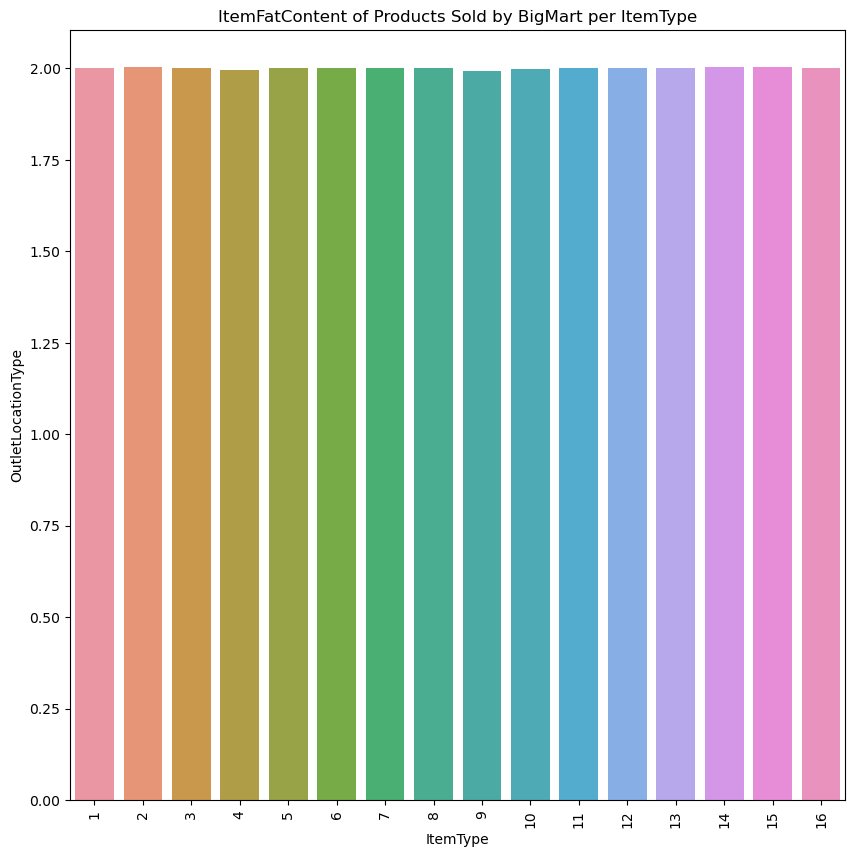

In [70]:
plt.figure(figsize=(10,10))

sns.barplot(data = dfz, x = "ItemType", y = "OutletLocationType", ci=None) #When you deleted "ci = None"; this shows the confidence interval per category.

plt.xticks(rotation = 90)
plt.title('ItemFatContent of Products Sold by BigMart per ItemType')

In [71]:
pd.crosstab(dfz["OutletLocationType"],dfz["ItemType"], margins=True, normalize=True)

ItemType,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
OutletLocationType,,,,,,,,,,,,,,,,,
1,0.030714,0.011485,0.005162,0.030843,0.032004,0.039876,0.056652,0.010195,0.024519,0.043489,0.020390,0.007743,0.002581,0.056136,0.020519,0.007743,0.400052
2,0.015228,0.005807,0.002581,0.015228,0.016002,0.020003,0.028262,0.005162,0.012002,0.021809,0.010324,0.003871,0.001290,0.028262,0.010324,0.003871,0.200026
3,0.030714,0.011614,0.005162,0.030585,0.032004,0.039876,0.056652,0.010195,0.024003,0.043360,0.020390,0.007743,0.002581,0.056652,0.020648,0.007743,0.399923
All,0.076655,0.028907,0.012905,0.076655,0.080010,0.099755,0.141567,0.025552,0.060524,0.108659,0.051103,0.019357,0.006452,0.141050,0.051491,0.019357,1.000000


In [72]:
pd.crosstab(dfz["OutletLocationType"], dfz["ItemType"], margins=True, normalize=False)

ItemType,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
OutletLocationType,,,,,,,,,,,,,,,,,
1,238,89,40,239,248,309,439,79,190,337,158,60,20,435,159,60,3100
2,118,45,20,118,124,155,219,40,93,169,80,30,10,219,80,30,1550
3,238,90,40,237,248,309,439,79,186,336,158,60,20,439,160,60,3099
All,594,224,100,594,620,773,1097,198,469,842,396,150,50,1093,399,150,7749


In [73]:
dfz["OutletLocationType"].value_counts()

1    3100
3    3099
2    1550
Name: OutletLocationType, dtype: int64

In [74]:
dfz["OutletLocationType"].value_counts(sum)

1    0.400052
3    0.399923
2    0.200026
Name: OutletLocationType, dtype: float64

In [75]:
dfz["ItemType"].value_counts()

7     1097
14    1093
10     842
6      773
5      620
1      594
4      594
9      469
15     399
11     396
2      224
8      198
16     150
12     150
3      100
13      50
Name: ItemType, dtype: int64

In [76]:
dfz["ItemType"].value_counts(sum)

7     0.141567
14    0.141050
10    0.108659
6     0.099755
5     0.080010
1     0.076655
4     0.076655
9     0.060524
15    0.051491
11    0.051103
2     0.028907
8     0.025552
16    0.019357
12    0.019357
3     0.012905
13    0.006452
Name: ItemType, dtype: float64

Text(0.5, 1.0, 'Stat Breakdown of ItemType per OutletLocationType at BigMart')

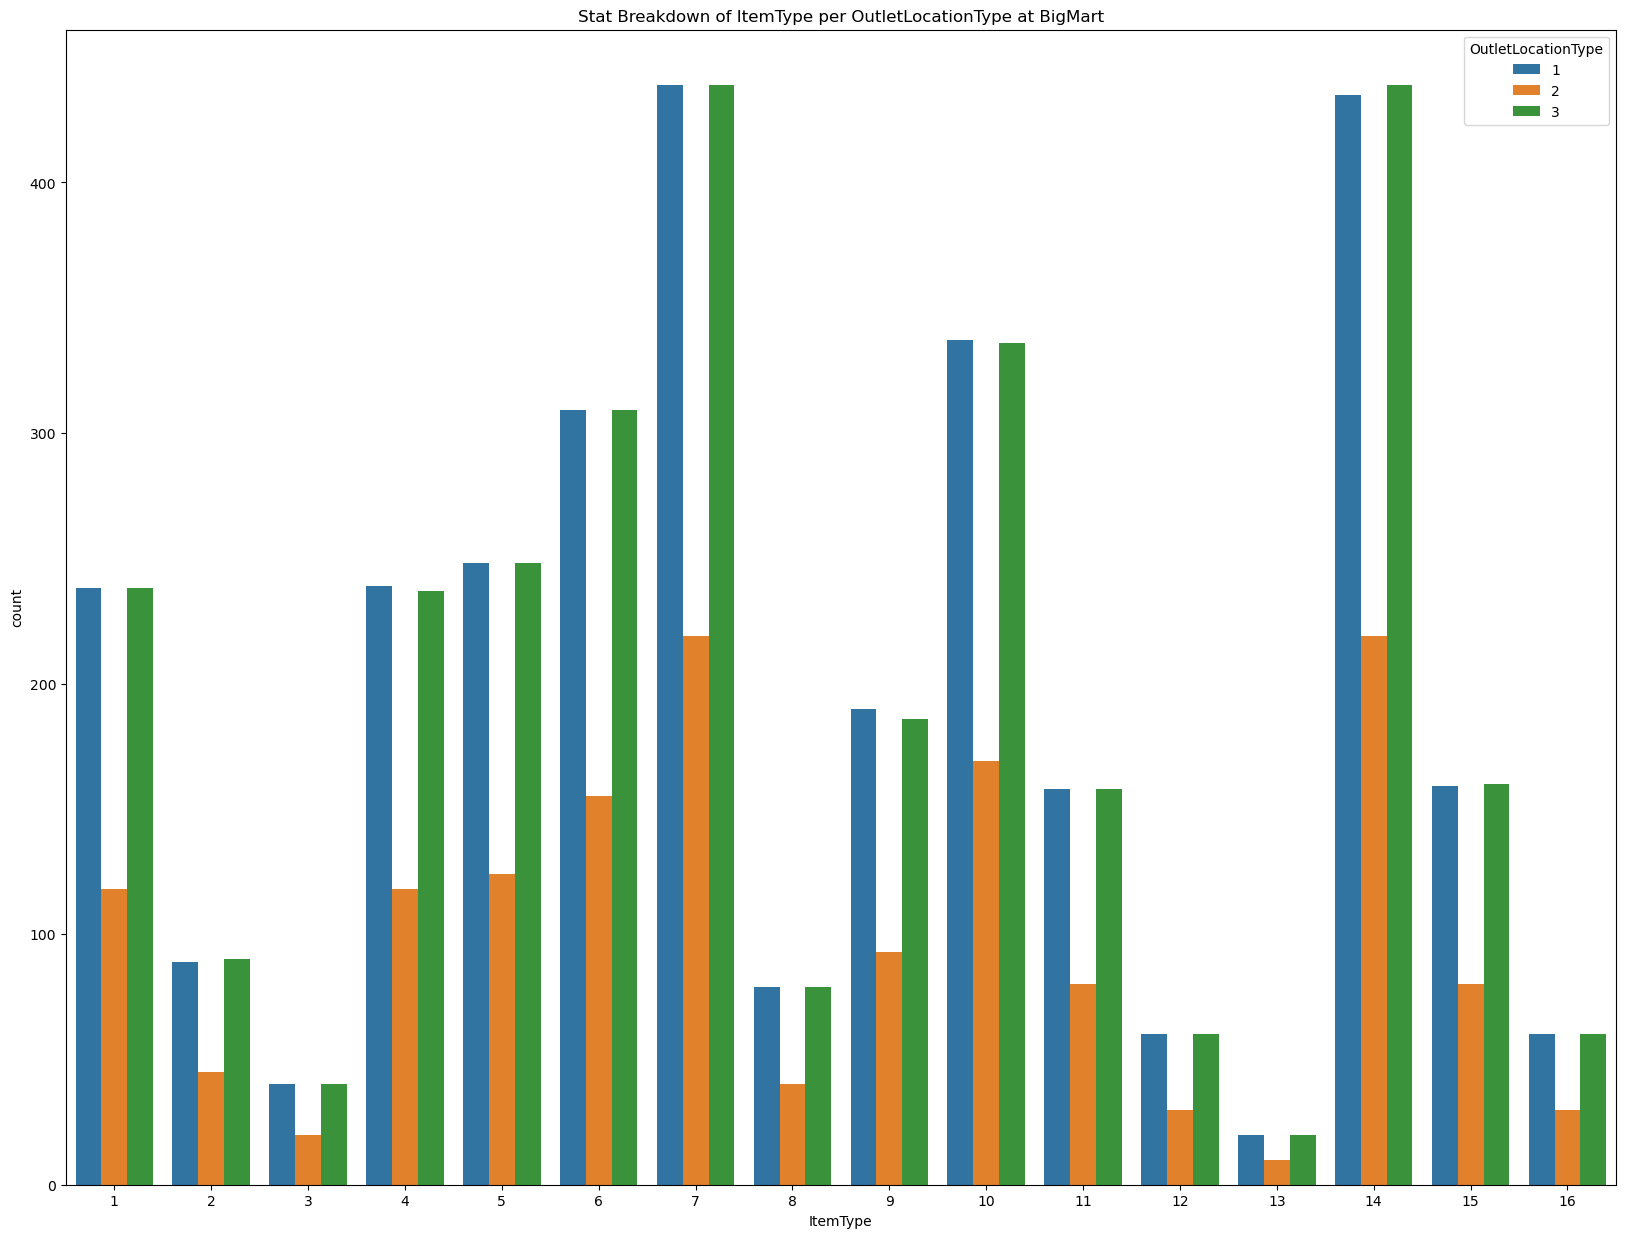

In [77]:
#["Baking Goods", "Breads", "Breakfast", "Canned", "Dairy","Frozen Foods","Fruits and Vegetables","Hard Drinks", "Health and Hygiene","Household","Meat","Others","Seafood","Snack Foods","Soft Drinks","Starchy Foods"]
#        1,           2,         3,          4,       5,           6,              7,                    8,              9,               10,       11,     12,       13,         14,           15,            16

plt.figure(figsize=(20,15))

sns.countplot(data = dfz, x = "ItemType", hue = "OutletLocationType")

plt.xticks(rotation = 360)
plt.title('Stat Breakdown of ItemType per OutletLocationType at BigMart')



In [78]:
pivot_table = dfz.pivot_table(index='OutletLocationType', columns='ItemType', values='ItemOutletSales', aggfunc='sum', margins=False)
print(pivot_table)

ItemType                       1              2             3              4   \
OutletLocationType                                                              
1                   501028.448958  208281.023390  85641.808430  526631.393485   
2                   237145.446386  110667.940251  50964.894643  275668.120458   
3                   433636.859910  192175.758105  78316.223732  471314.958084   

ItemType                       5              6              7   \
OutletLocationType                                                
1                   545233.443703  668667.974473  990172.319551   
2                   300025.933312  339241.077409  511425.859394   
3                   529383.177787  606292.987004  938100.827568   

ItemType                       8              9              10  \
OutletLocationType                                                
1                   168302.992919  409579.267464  779188.282315   
2                    89893.700538  211767.152061  410985.

In [79]:
##: according to my findings above, we can see that the best performing OutletLocationType per ItemType sold are:

#OutletLocationType 1 & 2 for ItemType 7,10,14 are the top sellers to BigMartConsumers

# this is my third analysis to scale the business of the company BigMart

In [80]:
#this is my third analysis to scale the business of the company BigMart


#["Supermarket Type1","Supermarket Type2"],[1,2]

dfz["OutletType"].groupby(dfz["ItemType"]).mean()

ItemType
1     1.200337
2     1.200893
3     1.200000
4     1.200337
5     1.200000
6     1.199224
7     1.199635
8     1.196970
9     1.196162
10    1.199525
11    1.196970
12    1.200000
13    1.200000
14    1.200366
15    1.200501
16    1.200000
Name: OutletType, dtype: float64

Text(0.5, 1.0, 'Stat Breakdown of OutletType per ItemType sold at BigMart')

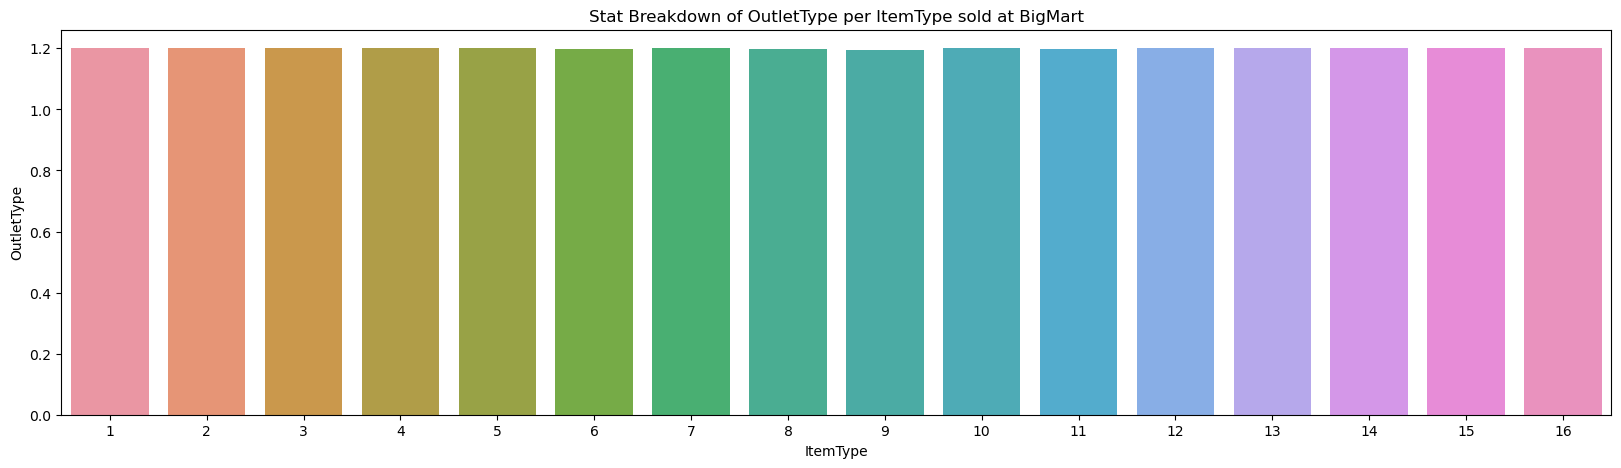

In [81]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "ItemType", y = "OutletType", ci = None)

plt.xticks(rotation = 360)
plt.title('Stat Breakdown of OutletType per ItemType sold at BigMart')

In [82]:
pd.crosstab(dfz["OutletType"],dfz["ItemType"], margins=True, normalize=True)

ItemType,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
OutletType,,,,,,,,,,,,,,,,,
1,0.061298,0.023100,0.010324,0.061298,0.064008,0.079881,0.113305,0.020519,0.048651,0.086979,0.041038,0.015486,0.005162,0.112789,0.041167,0.015486,0.80049
2,0.015357,0.005807,0.002581,0.015357,0.016002,0.019874,0.028262,0.005033,0.011872,0.021680,0.010066,0.003871,0.001290,0.028262,0.010324,0.003871,0.19951
All,0.076655,0.028907,0.012905,0.076655,0.080010,0.099755,0.141567,0.025552,0.060524,0.108659,0.051103,0.019357,0.006452,0.141050,0.051491,0.019357,1.00000


In [83]:
pd.crosstab(dfz["OutletType"],dfz["ItemType"], margins=True, normalize=False)

ItemType,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
OutletType,,,,,,,,,,,,,,,,,
1,475,179,80,475,496,619,878,159,377,674,318,120,40,874,319,120,6203
2,119,45,20,119,124,154,219,39,92,168,78,30,10,219,80,30,1546
All,594,224,100,594,620,773,1097,198,469,842,396,150,50,1093,399,150,7749


In [84]:
dfz["OutletType"].value_counts()

1    6203
2    1546
Name: OutletType, dtype: int64

In [85]:
dfz["OutletType"].value_counts(sum)

1    0.80049
2    0.19951
Name: OutletType, dtype: float64

In [86]:
pivot_table = dfz.pivot_table(index='OutletType', columns='ItemType', values='ItemOutletSales', aggfunc='sum', margins=False)
print(pivot_table)

ItemType               1              2              3             4   \
OutletType                                                              
1           968974.406735  417146.662783  174568.142199  1.056567e+06   
2           202836.348519   93978.058963   40354.784605  2.170479e+05   

ItemType              5             6             7              8   \
OutletType                                                            
1           1.124083e+06  1.334493e+06  2.014000e+06  344308.376977   
2           2.505596e+05  2.797093e+05  4.256987e+05   72699.141651   

ItemType               9             10             11             12  \
OutletType                                                              
1           801210.424462  1.582007e+06  712995.759869  254359.545798   
2           174049.784405  3.404199e+05  155783.686447   57894.533967   

ItemType               13            14             15             16  
OutletType                                               

Text(0.5, 1.0, 'Stat Breakdown of ItemType per OutletType at BigMart')

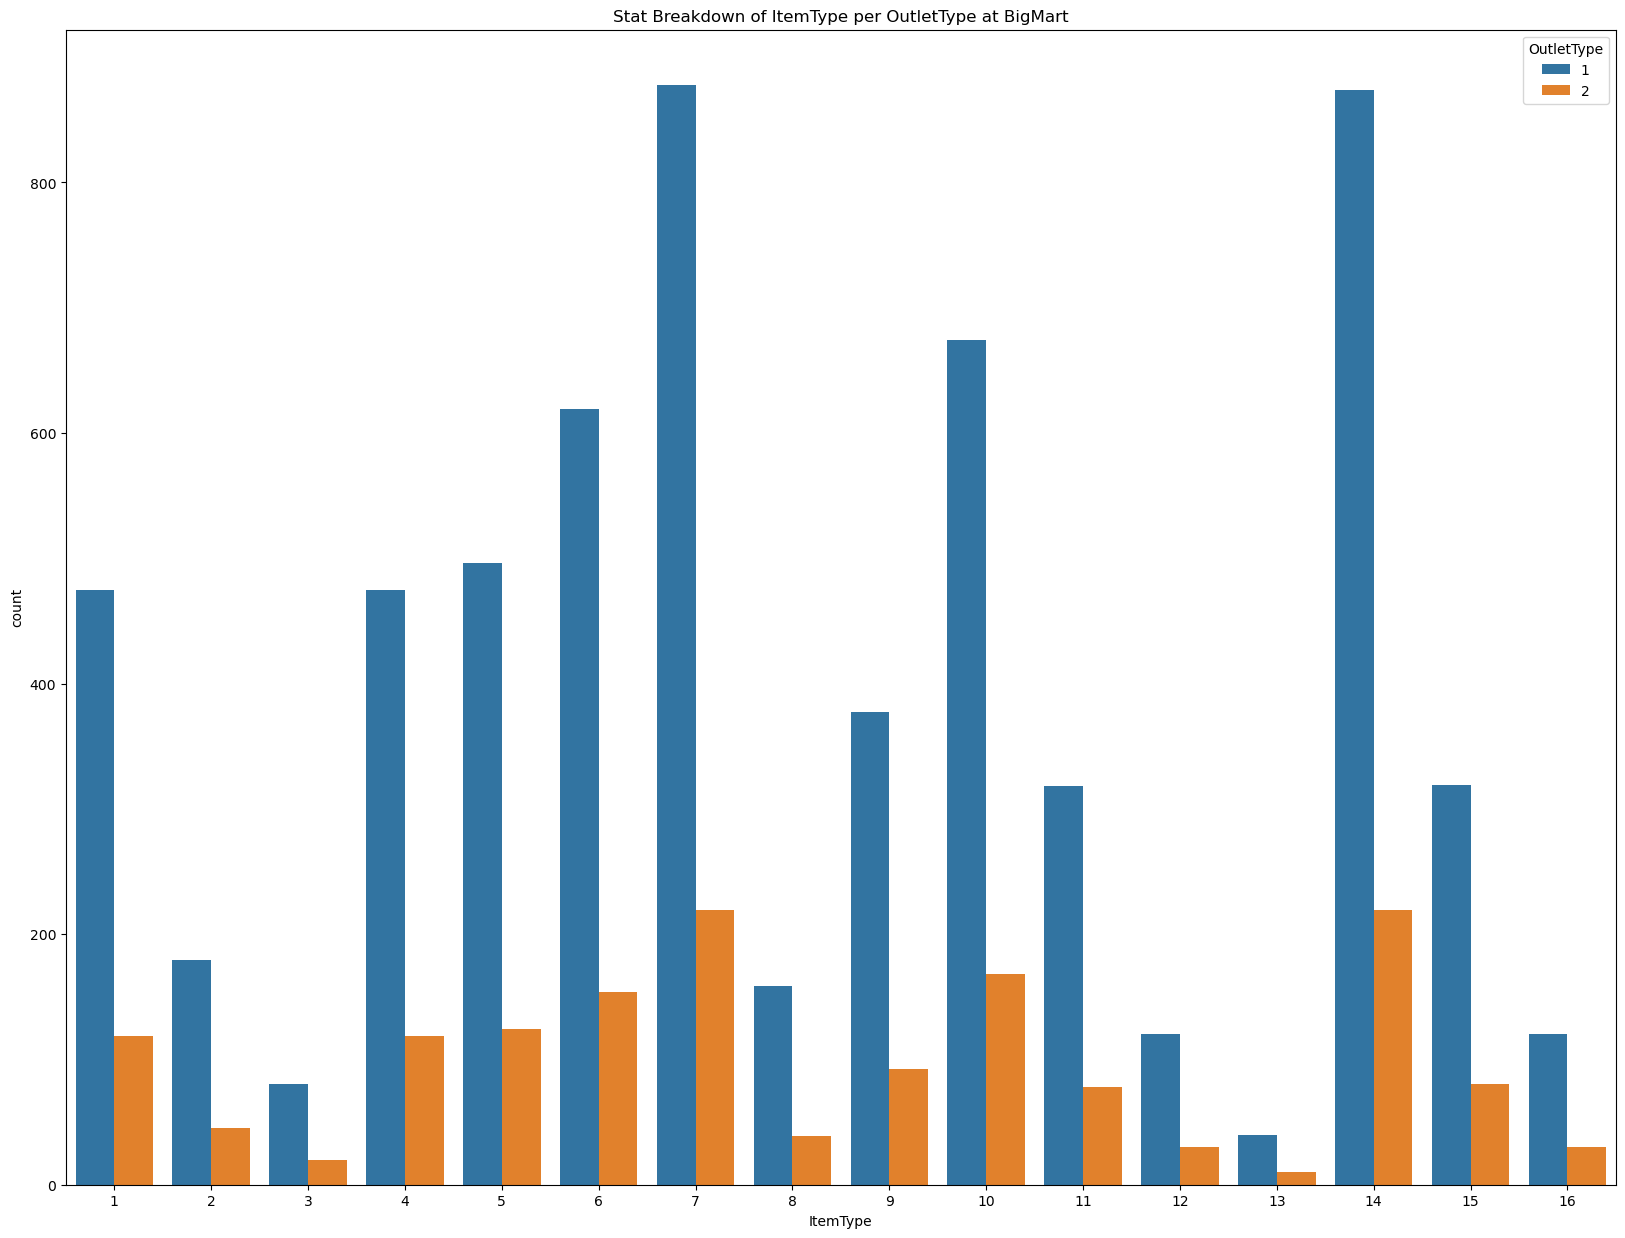

In [87]:
plt.figure(figsize=(20,15))

sns.countplot(data = dfz, x = "ItemType", hue = "OutletType")

plt.xticks(rotation = 360)
plt.title('Stat Breakdown of ItemType per OutletType at BigMart')

In [88]:
## --- as shown from the analysis done above for "OutletTypes". We can conclude that Supermarket type 1 has most of the sales per ItemType category compared to Supermarket Type 2
## --- the analysis also illustrates that majority of ItemTypes or products sold in SuperMarket Type 1 were the same compared to the 2 other analysis I conducted which is ItemType 7, 10 and 14

# --CONDUCTING TEST OF SIGNIFANCE, ODDS RATIO, PERCENT CHANGE, COEFFICIENTS INTERPRETATIONS TO SUPPORT ALL MY BUSINESS ANALYSIS--#

In [89]:
dfz

,ItemIdentifier,ItemWeight,ItemFatContent,ItemVisibility,ItemType,ItemMRP,OutletIdentifier,OutletEstablishment Year,OutletSize,OutletLocationType,...,ItemOutletSales,zscore_ItemWeight,zscore_ItemFatContent,zscore_ItemVisibility,zscore_ItemType,zscore_ItemMRP,zscore_OutletSize,zscore_OutletLocationType,zscore_OutletType,zscore_ItemOutletSales
0,FDA15,9.300,0,0.016047,5,249.8092,OUT049,1999,2,1,...,3735.138000,0.753174,0.738979,0.995320,0.767675,1.751605,0.266633,1.117908,0.499234,1.180316
1,DRC01,5.920,1,0.019278,15,48.2692,OUT018,2009,2,3,...,443.422800,1.480004,1.353219,0.922232,1.601575,1.494100,0.266633,1.118196,2.003070,1.313690
2,FDN15,17.500,0,0.016760,11,141.6180,OUT049,1999,2,1,...,2097.270000,1.010142,0.738979,0.979196,0.653875,0.009238,0.266633,1.117908,0.499234,0.060633
4,NCD19,8.930,0,0.000000,10,53.8614,OUT013,1987,3,3,...,994.705200,0.832738,0.738979,1.358337,0.416950,1.404040,1.602214,1.118196,0.499234,0.896004
5,FDP36,10.395,1,0.000000,1,51.4008,OUT018,2009,2,3,...,556.608800,0.517706,1.353219,1.358337,1.715375,1.443667,0.266633,1.118196,2.003070,1.227933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14196,FDF46,7.070,0,0.094053,14,116.0834,OUT018,2009,2,3,...,1691.772707,1.232709,0.738979,0.769295,1.364650,0.401985,0.266633,1.118196,2.003070,0.367863
14197,DRL35,15.700,0,0.030704,8,43.2770,OUT046,1997,1,1,...,612.708246,0.623073,0.738979,0.663769,0.056900,1.574497,1.068947,1.117908,0.499234,1.185429
14198,FDW46,13.000,1,0.070411,14,63.4484,OUT049,1999,2,1,...,1001.645945,0.042469,1.353219,0.234478,1.364650,1.249646,0.266633,1.117908,0.499234,0.890746
14199,FDB58,10.500,1,0.013496,14,141.3154,OUT046,1997,1,1,...,2213.476465,0.495127,1.353219,1.053024,1.364650,0.004364,1.068947,1.117908,0.499234,0.027412


In [90]:
#Let's try a LOGISTIC REGRESSION pertaining to the variable/column "ItemFatContent"

In [91]:
mod1 = sm.logit("ItemFatContent ~ ItemType + OutletType + OutletLocationType", data=dfz).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.638013
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         ItemFatContent   No. Observations:                 7749
Model:                          Logit   Df Residuals:                     7745
Method:                           MLE   Df Model:                            3
Date:                Thu, 11 May 2023   Pseudo R-squ.:                 0.01755
Time:                        01:33:46   Log-Likelihood:                -4944.0
converged:                       True   LL-Null:                       -5032.3
Covariance Type:            nonrobust   LLR p-value:                 4.755e-38
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0013      0.090      0.014      0.989      -0.175       0.178
ItemType              -0.0760      0.006    -13.097      0.000      -0.087      -0.065
OutletType            -0.0004      0.072     -0.006      0.996      -0.142       0.142
OutletLocationType     0.0028      0.032      0.087      0.930      -0.061       0.066
======================================================================================
"""

In [92]:
#printing my variable coefficients

mod1.params

#According to the values potrayed below, non of these values are intuitive or easy to report. Therefore, I need to conduct another test.

Intercept             0.001258
ItemType             -0.076042
OutletType           -0.000402
OutletLocationType    0.002832
dtype: float64

In [93]:
#ODDS RATIO(OR) Testing

OR represents the odds that an outcome will occur given a specific event/exposure, compared to the odds of the outcome occuring without the event/exposure. We can convert our model coefficients to odds ratios which will be easier to interpret.

* OR > 1 indicates increased occurrence of an event
* OR < 1 indicates decreased occurrence of an event 

In [94]:
dfz_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

dfz_odds["pvalue"] = mod1.pvalues

dfz_odds["Sig"] = np.where(dfz_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

dfz_odds

,OR,pvalue,Sig
Intercept,1.001258,9.888649e-01,Not Sig
ItemType,0.926777,3.414049e-39,Sig
OutletType,0.999598,9.955773e-01,Not Sig
OutletLocationType,1.002836,9.303366e-01,Not Sig


In [95]:
#We can from the results above that the independent variable "ItemType" has a increase occurence of event for the dependent variable "ItemFatContent"
#It makes logical sense since all of the each ItemType sold at BigMart contains either low fat or regular fat

In [96]:
#PERCENT CHANGE (PP)

use this value to provide a simplier explaination (using percentages) regarding how changes in your independent variables influence the dependent variable. Percentages are typically easier for people to understand and allow you to quickly determine the direction and magnitude of the relationship between your variables.

* PC > 0 indicates increased odds of an event
* PC < 0 indicates decreased odds of an event 

In [97]:
## percent change formula = OR minus 1 multiplied by 100

dfz_odds["Pct Change"] = (dfz_odds["OR"] - 1) * 100

dfz_odds

,OR,pvalue,Sig,Pct Change
Intercept,1.001258,9.888649e-01,Not Sig,0.125839
ItemType,0.926777,3.414049e-39,Sig,-7.322267
OutletType,0.999598,9.955773e-01,Not Sig,-0.040169
OutletLocationType,1.002836,9.303366e-01,Not Sig,0.283593


* PC > 0 : with each one-unit increase in X, the odds of << outcome >> increase by << % change >>

* PC < 0 : with each one-unit increase in X, the odds of << outcome >> decrease by << % change >>

ItemType

With each one-unit increase "ItemType", the odds of << "ItemFatContent" >> decrease by << -7.322267% change >>

With each one-unit increase in "OutletType", the odds of << "ItemFatContent" >> increase by << -0.040169% change >>

With each one-unit increase in "OutletLocationType", the odds of << "ItemFatContent" >> increase by << 0.283593% change >>

In [98]:
#Logistic Regression Model Predictions

In [99]:
#ItemFatContent
#[Low Fat, Regular Fat]
#    0          1

#ItemType#
#["Baking Goods", "Breads", "Breakfast", "Canned", "Dairy","Frozen Foods","Fruits and Vegetables","Hard Drinks", "Health and Hygiene","Household","Meat","Others","Seafood","Snack Foods","Soft Drinks","Starchy Foods"]
#        1,           2,         3,          4,       5,           6,              7,                    8,              9,               10,       11,     12,       13,         14,           15,            16

#OutLetType#
#SuperMarket Type 1, SuperMarket Type 2
#          1                 2

#OutletLocationType#
#Tier 1, Tier 2, Tier 3
#  1       2        3

#Lets predict the probablity/chances of a customer/clients shopping at BigMart chosing an item
mod1.predict({
    "ItemFatContent": 0,
    "ItemType": 3,
    "OutletType": 1,
    "OutletLocationType": 3})

0    0.445524
dtype: float64

In [100]:
#Another way/code to make my predictions for customer/client picking a product with the variables 'ItemFatContent ~ ItemType + OutletType + OutletLocationType'

In [101]:
# Create a DataFrame
df = pd.DataFrame({'ItemType': [1], 'OutletType': [1], 'OutletLocationType': [1]})

# Create a model
model = smf.ols('ItemFatContent ~ ItemType + OutletType + OutletLocationType', data=dfz)

# Fit the model
fit = model.fit()

# Predict the dependent variable
predictions = fit.predict(df)

# Print the predictions
print(predictions)

0    0.475647
dtype: float64


In [102]:
#dfz.to_excel('BigMartProductSalesFactors 2 PYTHON DATA CLEAN UP.xlsx')